In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
#import data
md_df = pd.read_csv('Resources/Pymaceuticals_data_Mouse_metadata.csv')
sr_df = pd.read_csv('Resources/Pymaceuticals_data_Study_results.csv')
md_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
sr_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
sr_df = sr_df.drop_duplicates()
df = pd.merge(md_df, sr_df, on='Mouse ID')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen.
drug_df = df.groupby(['Drug Regimen'])
tumorMean = drug_df['Tumor Volume (mm3)'].mean()
tumorMedian = drug_df['Tumor Volume (mm3)'].median()
tumorVar = drug_df['Tumor Volume (mm3)'].var()
tumorSD = drug_df['Tumor Volume (mm3)'].std()
tumorSEM = drug_df["Tumor Volume (mm3)"].sem()
#regimen_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drugSummary = pd.DataFrame({'Tumor Mean Volume': tumorMean,
                           'Tumor Median Volume': tumorMedian,
                           'Tumor Variance': tumorVar,
                           'Tumor Standard Deviation': tumorSD,
                           'Tumor SEM': tumorSEM})
drugSummary

,Tumor Mean Volume,Tumor Median Volume,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<BarContainer object of 10 artists>

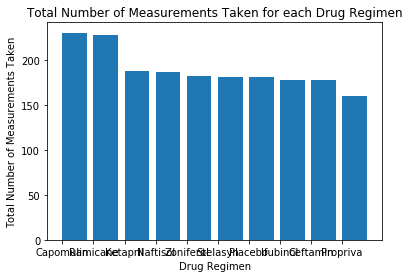

In [7]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
drugCounts = df['Drug Regimen'].value_counts()
xaxis = np.arange(0,len(drugCounts))
tickLocations = [value for value in xaxis]
plt.xticks(tickLocations, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Ifubinol','Ceftamin','Propriva'])
plt.title('Total Number of Measurements Taken for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements Taken')
plt.bar(xaxis, drugCounts, align='edge')

Text(0.5, 1.0, 'Total Number of Measurements Taken for each Drug Regimen')

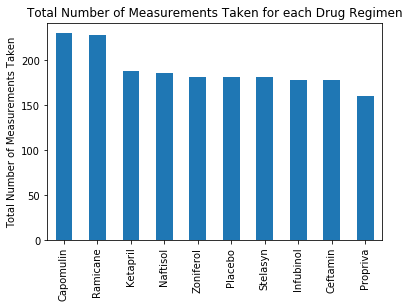

In [8]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
drugCounts.plot(kind="bar")
plt.ylabel('Total Number of Measurements Taken')
plt.title('Total Number of Measurements Taken for each Drug Regimen')

([<matplotlib.patches.Wedge at 0x7f852bd8cc18>,
 [Text(-0.6901369591455114, -0.8565693069573453, 'Male'),
  Text(0.6901370393433148, 0.8565692423420561, 'Female')],
 [Text(-0.3764383413520971, -0.4672196219767338, '50.6%'),
  Text(0.37643838509635347, 0.46721958673203057, '49.4%')])

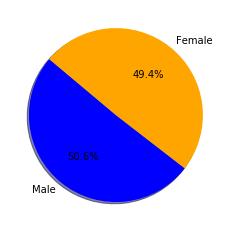

In [9]:
#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
sex_df = df['Sex'].value_counts()
sizes = [sex_df[0], sex_df[1]]
labels = ["Male", 'Female']
#explode = (0.1, 0, 0, 0)
colors = ["Blue", "Orange"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

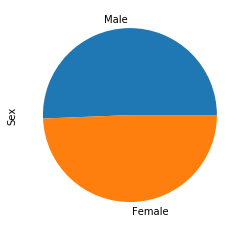

In [10]:
#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
sex_df.plot(kind="pie")

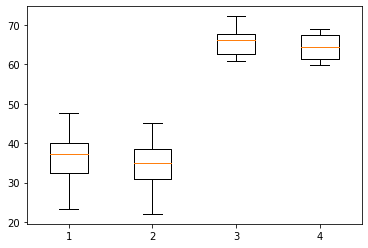

In [11]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
#quantitatively determine if there are any potential outliers across all four treatment regimens.

#Locate by Drug Name 
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
ramicane_df = df.loc[df["Drug Regimen"] == "Ramicane"]
infubinol_df = df.loc[df["Drug Regimen"] == "Infubinol"]
ceftamin_df = df.loc[df["Drug Regimen"] == "Ceftamin"]

#Locate by final timepoint
capomulin_df = capomulin_df.loc[capomulin_df['Timepoint'] == 45]
ramicane_df = ramicane_df.loc[ramicane_df['Timepoint'] == 45]
infubinol_df = infubinol_df.loc[infubinol_df['Timepoint'] == 45]
ceftamin_df = ceftamin_df.loc[ceftamin_df['Timepoint'] == 45]

#Final Tumor Volume by Drug
capomulinFinalVolume = capomulin_df['Tumor Volume (mm3)']
ramicaneFinalVolume = ramicane_df['Tumor Volume (mm3)']
infubinolFinalVolume = infubinol_df['Tumor Volume (mm3)']
ceftaminFinalVolume = ceftamin_df['Tumor Volume (mm3)']

#Calculate the quartiles and IQR and 
#quantitatively determine if there are any potential outliers across all four treatment regimens.

capomulinQuartiles = capomulinFinalVolume.quantile([0.25,0.5,0.75])
capomulinLowerq = capomulinQuartiles[0.25]
capomulinUpperq = capomulinQuartiles[0.75]
capomulinIQR = capomulinUpperq - capomulinLowerq 

ramicaneQuartiles = ramicaneFinalVolume.quantile([0.25,0.5,0.75])
ramicaneLowerq = ramicaneQuartiles[0.25]
ramicaneUpperq = ramicaneQuartiles[0.75]
ramicaneIQR = ramicaneUpperq - ramicaneLowerq 

infubinolQuartiles = infubinolFinalVolume.quantile([0.25,0.5,0.75])
infubinolLowerq = infubinolQuartiles[0.25]
infubinolUpperq = infubinolQuartiles[0.75]
infubinolIQR = infubinolUpperq - infubinolLowerq 

ceftaminQuartiles = ceftaminFinalVolume.quantile([0.25,0.5,0.75])
ceftaminLowerq = ceftaminQuartiles[0.25]
ceftaminUpperq = ceftaminQuartiles[0.75]
ceftaminIQR = ceftaminUpperq - ceftaminLowerq 

data = [capomulinFinalVolume, ramicaneFinalVolume, infubinolFinalVolume, ceftaminFinalVolume]
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and 
#highlight any potential outliers in the plot by changing their color and style.
fig, ax = plt.subplots()

ax.boxplot(data)
plt.show()



Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Timepoint for Capomulin Mouse s185')

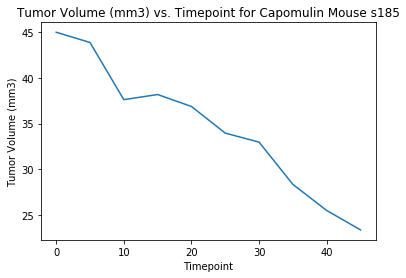

In [12]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
capomulinMouse = df.loc[df["Mouse ID"] == "s185"]
x_axis = capomulinMouse["Timepoint"]
y_axis = capomulinMouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Timepoint for Capomulin Mouse s185")

Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Weight (g) for Capomulin')

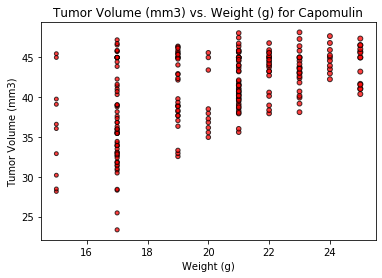

In [13]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
x_axis = capomulin_df["Weight (g)"]
y_axis = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Weight (g) for Capomulin")

The correlation between weight and average of tumor volume for the Capomulin treatment is 0.53


Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Weight (g) for Capomulin')

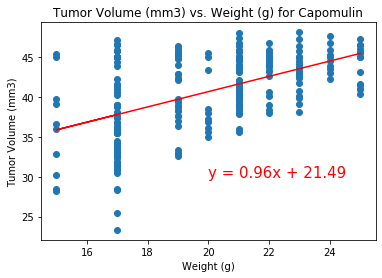

In [14]:
#Calculate the correlation coefficient and linear regression model between mouse weight and 
#average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
x_axis = capomulin_df["Weight (g)"]
y_axis = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = sts.pearsonr(x_axis,y_axis)
print(f"The correlation between weight and average of tumor volume for the Capomulin treatment is {round(correlation[0],2)}")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Weight (g) for Capomulin")

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences 
#that can be made from the data. Include these observations at the top of notebook.